In [2]:
import numpy as np

import matplotlib.pyplot as plt

import scienceplots
from tqdm import tqdm

import gwlss

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
paths = gwlss.Paths(gwlss.paths_glamdring)

In [4]:
event = paths.load_event("GW170817")

ra = event["ra"][:]
dec = event["dec"][:]
z = event["redshift"][:]

m = ra > 2.5

In [5]:
x0 = gwlss.load_field("GW170817", "density", paths, 512)
# x = np.mean(x, axis=0)[:, 0]

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:11<00:00,  8.85it/s]


In [6]:
# x = x0[100, :, 0]

x = x0[..., 0]

# x = np.mean(x0, axis=0)[:, 0]
# 
# std = np.std(x0, axis=0)[:, 0]

In [27]:
prob = gwlss.resample_from_density(x, "simple_bias", [-4])


prob = np.mean(prob, axis=0)
# prob = gwlss.resample_from_density(x, "sigmoid_bias", [-1.0, 4.0])
# prob = prob.astype(np.float64)

prob[m] /= prob[m].sum()
prob[m] *= m.sum()

In [28]:
prob

array([0.64339083, 0.5149696 , 0.3789225 , ..., 0.18897621, 0.14233877,
       0.21067905], dtype=float32)

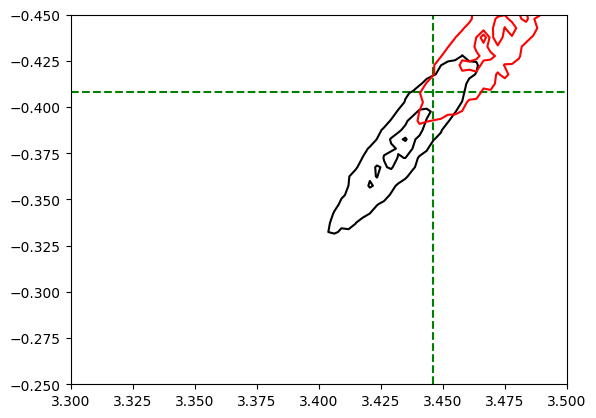

In [29]:
def add_sigma_contours(x, y, weights=None, bins=100, colors=['white', 'yellow', 'red']):
    # Create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=weights)
    
    # Compute contour levels for 1-sigma, 2-sigma, and 3-sigma
    sorted_H = np.sort(H.flatten())[::-1]
    cdf = np.cumsum(sorted_H)
    cdf /= cdf[-1]
    levels = [
        sorted_H[np.argmax(cdf > (1 - 0.3935))],   # 1-sigma
        sorted_H[np.argmax(cdf > (1 - 0.8647))],   # 2-sigma
        sorted_H[np.argmax(cdf > (1 - 0.9889))]    # 3-sigma
    ]

    # Define the coordinate grid
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

    # Add contours to the existing plot
    plt.contour(X, Y, H.T, levels=levels, colors=colors)


plt.figure()
# Assuming 'ra' and 'dec' are your samples and 'prob' is the weight for each sample.
# Use plt.scatter or plt.hexbin or any other function here to plot your data before adding contours.
# plt.hexbin(ra[m], dec[m], gridsize=100, mincnt=1, bins="log")
add_sigma_contours(ra[m], dec[m], bins=100, colors="black")
add_sigma_contours(ra[m], dec[m], weights=prob[m], bins=100, colors="red")

plt.axvline(np.deg2rad(gwlss.gw170817["RA"]), color="green", linestyle="--", zorder=0)
plt.axhline(np.deg2rad(gwlss.gw170817["dec"]), color="green", linestyle="--", zorder=0)

plt.xlim(3.3, 3.5)
plt.ylim(-0.25, -0.45)

plt.show()


196.93410557522742 1.2598409496163716
198.98133042571783


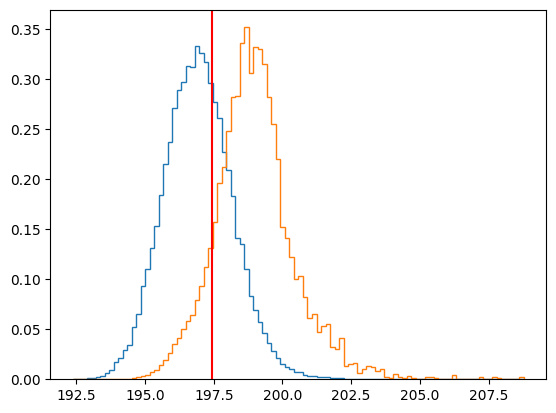

-21.796640062725185 2.098806322624793
-25.094585484749995


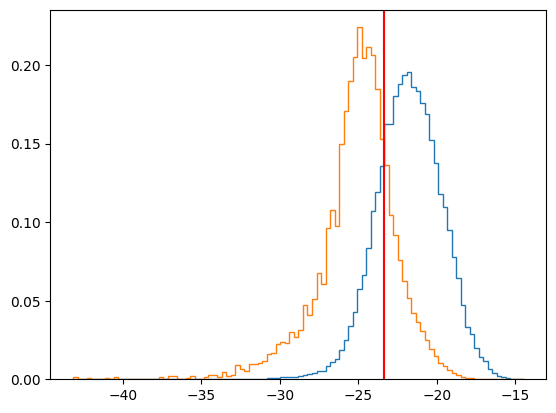

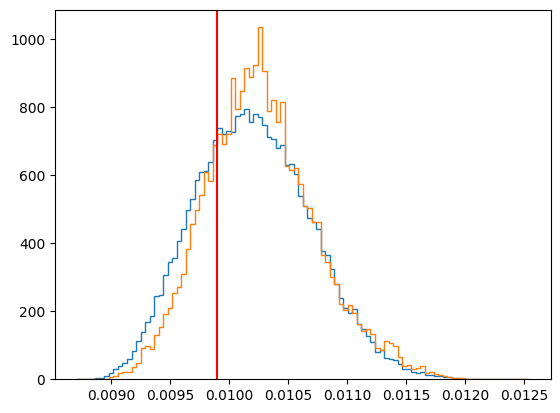

In [30]:
plt.figure()
plt.hist(ra[m] * 180 / np.pi, bins=100, histtype="step", density=1)

print(np.mean(ra[m] * 180 / np.pi), np.std(ra[m] * 180 / np.pi))

plt.hist(ra[m] * 180 / np.pi, bins=100, weights=prob[m], histtype="step", density=1)

print(np.average(ra[m] * 180 / np.pi, weights=prob[m]))


plt.axvline(gwlss.gw170817["RA"], c="red")

plt.show()


plt.figure()
plt.hist(dec[m] * 180 / np.pi, bins=100, histtype="step", density=1)

print(np.mean(dec[m] * 180 / np.pi), np.std(dec[m] * 180 / np.pi))

plt.hist(dec[m] * 180 / np.pi, bins=100, weights=prob[m], histtype="step", density=1)

print(np.average(dec[m] * 180 / np.pi, weights=prob[m]))


plt.axvline(gwlss.gw170817["dec"], c="red")

plt.show()



plt.figure()
plt.hist(z[m], bins=100, histtype="step", density=1)
plt.hist(z[m], bins=100, weights=prob[m], histtype="step", density=1)

plt.axvline(gwlss.gw170817["redshift"], c="red")

plt.show()

In [20]:
np.random.choice(len(prob), len(prob), replace=True, p=prob)

ValueError: probabilities do not sum to 1

In [21]:
event.keys()

<KeysViewHDF5 ['chi_eff', 'dec', 'delta_tc', 'distance', 'inclination', 'lambda1', 'lambda2', 'loglikelihood', 'logwt', 'polarization', 'q', 'ra', 'redshift', 'spin1z', 'spin2z', 'srcmass1', 'srcmass2', 'srcmchirp']>

In [124]:
event["loglikelihood"][:]

array([-1628973.91664231, -1628977.84406372, -1628975.61171567, ...,
       -1628978.530123  , -1628975.65296812, -1628973.83334383])

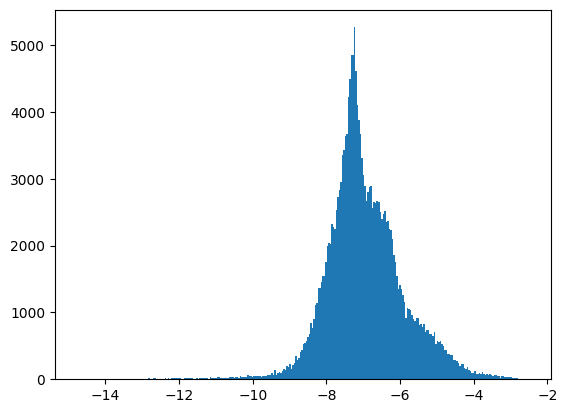

In [113]:
plt.figure()
plt.hist(np.log10(prob), bins="auto")

plt.show()

In [77]:
prob

array([[0.04405689, 0.04342211, 0.03802957, 0.03070179, 0.02544474],
       [0.04078951, 0.042992  , 0.03895317, 0.03091612, 0.02523868],
       [0.04481057, 0.04588956, 0.04052459, 0.03185131, 0.02585573],
       ...,
       [0.12674588, 0.08144534, 0.04599917, 0.03287637, 0.02798287],
       [0.03291685, 0.03453796, 0.0371061 , 0.03110058, 0.02534881],
       [0.03503095, 0.03741708, 0.03821483, 0.03173828, 0.02605579]],
      dtype=float32)

In [62]:
x

array([[ 3.8821998,  3.8262649,  3.3510854,  2.7053764,  2.2421367],
       [ 3.5942852,  3.788364 ,  3.4324706,  2.7242632,  2.2239788],
       [ 3.9486127,  4.043691 ,  3.5709414,  2.8066697,  2.278352 ],
       ...,
       [11.168578 ,  7.176791 ,  4.053349 ,  2.8969963,  2.4657912],
       [ 2.900563 ,  3.0434117,  3.2697108,  2.740517 ,  2.233683 ],
       [ 3.0868535,  3.297114 ,  3.3674097,  2.7967103,  2.295981 ]],
      dtype=float32)

In [42]:
mu = np.mean(x, axis=0)
std = np.std(x, axis=0)

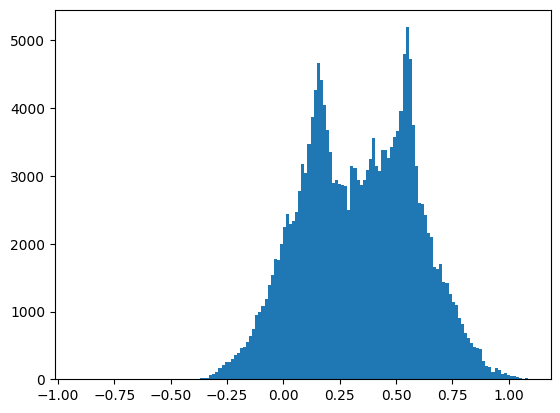

In [53]:
k = 0

plt.figure()
# plt.hist(np.log10(std[:, k] / mu[:, k]), bins="auto")
plt.hist(np.log10(x[10, :, k]), bins="auto")


plt.show()

In [7]:
fpath = paths.evaluated_field("GW170817", "density", 7444, 512, "PCS")

In [8]:
np.load(fpath)

100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


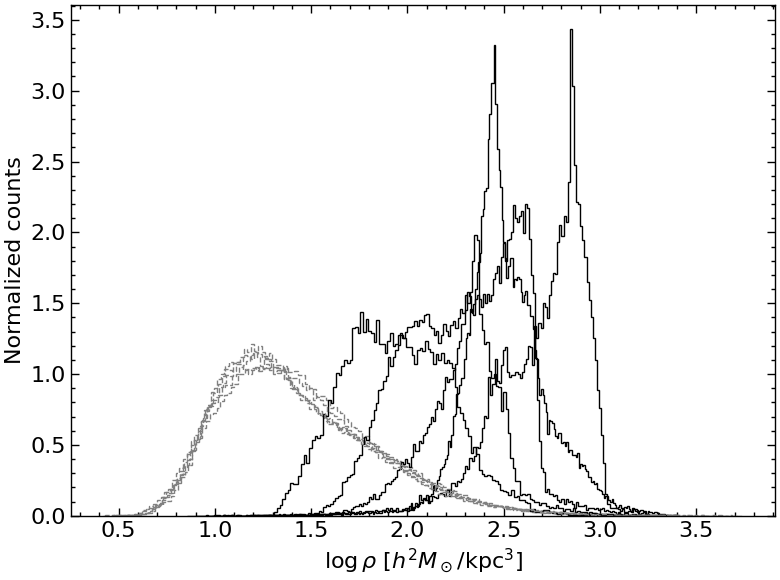

In [58]:
k = 0

with plt.style.context(["science", "notebook"]):
    plt.figure()
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i, nsim in enumerate(tqdm([7444 + n * 24 for n in range(5)])):
        fpath = f"/mnt/extraspace/rstiskalek/GWLSS/density_rsp_PCS_512_{nsim}_H1L1V1-EXTRACT_POSTERIOR_GW170817-1187008600-400.npz"
        d = np.load(fpath)
        val = d["val"]
        smooth_scales = d["smooth_scales"]
        rand_val = d["rand_val"]
        plt.hist(np.log10(val[:, k]), bins="auto", histtype="step", color="k", density=1)

        plt.hist(np.log10(rand_val[:, k, 0]), bins="auto", histtype="step", color="gray", ls="--", density=1)

    plt.xlabel(r"$\log \rho ~ [h^2 M_\odot / \mathrm{kpc}^3]$")
    plt.ylabel(r"Normalized counts")

    plt.tight_layout()
    plt.savefig(f"../plots/samples_density.png", dpi=300, bbox_inches="tight")

    plt.show()

In [37]:
smooth_scales

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [7]:

print(list(d.keys()))

['val', 'rand_val', 'indxs', 'smooth_scales']
